In [15]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from glob import glob
from scipy.stats import anderson_ksamp,PermutationMethod
import json

In [54]:
GSWLC=np.loadtxt('./Catalogs/GSWLC-D2.dat')
print(GSWLC.shape)
cat_logmass=GSWLC[::,9]
cat_SFR=GSWLC[::,11]
mask=np.full(len(cat_logmass),True,bool)
for i in range(len(cat_logmass)):
    if np.isclose(cat_logmass[i],-99):
        mask[i]=False
print(cat_logmass)

(48401, 24)
[10.343 11.118 10.469 ... 11.775 11.333 11.617]


In [17]:
sample_files=glob('./Samples/*.txt')
data={'MCG05':np.loadtxt(sample_files[0]),
      'MCG06':np.loadtxt(sample_files[1]),
      'NGC3016':np.loadtxt(sample_files[2]),
      'NGC3705':np.loadtxt(sample_files[3]),
      'NGC6365A':np.loadtxt(sample_files[4]),
      'NVSSJ09':np.loadtxt(sample_files[5]),
      'UGC9379':np.loadtxt(sample_files[6])}
log_mass_dict={}
logzsol_dict={}
dust2_dict={}
tau_dict={}
logSFR_dict={}
for gal in data.keys():
    log_mass_dict[gal]=data[gal][0]
    logzsol_dict[gal]=data[gal][1]
    dust2_dict[gal]=data[gal][2]
    tau_dict[gal]=data[gal][3]
    logSFR_dict[gal]=data[gal][4]

In [18]:
#add lines for quartiles
#change colours and transparency
sample_files=glob('./Samples/*.txt')
print(sample_files)
test=np.loadtxt(sample_files[0])
print(test[0].shape)
print(test[0])
nice_colours=['darkorchid','dodgerblue','forestgreen','goldenrod','peru','mediumslateblue','firebrick','dimgrey']

['./Samples/MCG05.txt', './Samples/MCG06.txt', './Samples/NGC3016.txt', './Samples/NGC3705.txt', './Samples/NGC6365A.txt', './Samples/NVSSJ09.txt', './Samples/UGC9379.txt']
(51304,)
[9.16428217 9.16428217 9.16428217 ... 9.16405833 9.16418063 9.16414228]


9.16421819023659
10.682384851787603
11.42278623913497
10.373068001997591
10.89606313721352
10.269011794866685
10.687090124446645
Anderson_ksampResult(statistic=-0.5238003225085445, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.6127744510978044)


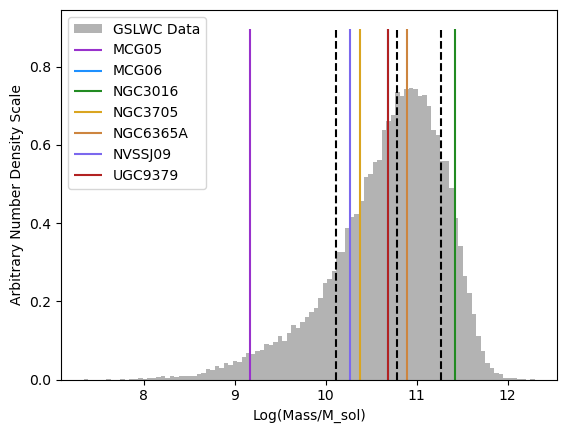

In [19]:
cat_hist,cat_bins=np.histogram(cat_logmass[mask],bins=100,density=True)
quants=np.quantile(cat_logmass[mask],[0.16,0.5,0.84])
plt.vlines(quants,ymin=0,ymax=0.9,colors='black',ls='--')
medians=[]
#plt.hist(cat_logmass[mask],bins=100,density=True)
plt.stairs(cat_hist, cat_bins,fill=True,alpha=0.5,label='GSLWC Data',color='dimgrey')
for num,gal in enumerate(log_mass_dict.keys()):
    med=np.median(log_mass_dict[gal])
    medians.append(med)
    print(med)
    plt.vlines(x=[med],ymin=0,ymax=1.2*np.max(cat_hist),color=nice_colours[num],label=gal)
    #hist_data,hist_bins=np.histogram(log_mass_dict[gal],bins=100,density=True)
    #hist_data*=np.max(cat_hist)/np.max(hist_data)
    #print(np.max(cat_hist))
    #print(np.max(hist_data))
    #plt.stairs(hist_data,hist_bins,label=f'{gal}',fill=True,alpha=0.7)
plt.legend()
plt.xlabel('Log(Mass/M_sol)')
plt.ylabel('Arbitrary Number Density Scale')
print(anderson_ksamp([medians,cat_logmass[mask]],method=PermutationMethod(n_resamples=500)))

-2.2922622582614958
-0.9460351223894554
0.3457989031685914
-1.1191767518590017
0.3283485768090633
0.30240740166100327
-0.11734799251686769
Anderson_ksampResult(statistic=-0.6226919805873947, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.7405189620758483)


Text(0, 0.5, 'Arbitrary Number Density Scale')

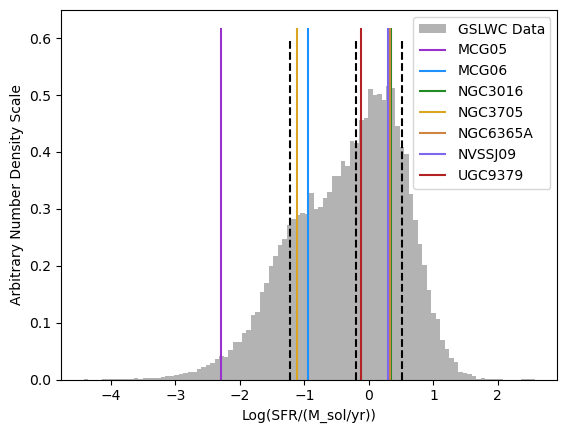

In [20]:
cat_hist,cat_bins=np.histogram(cat_SFR[mask],bins=100,density=True)
quants=np.quantile(cat_SFR[mask],[0.16,0.5,0.84])
plt.vlines(quants,ymin=0,ymax=0.6,colors='black',ls='--')
#plt.hist(cat_logmass[mask],bins=100,density=True)
plt.stairs(cat_hist, cat_bins,fill=True,alpha=0.5,label='GSLWC Data',color='dimgrey')
medians=[]
for num,gal in enumerate(logSFR_dict.keys()):
    med=np.median(logSFR_dict[gal])
    medians.append(med)
    print(med)
    plt.vlines(x=[med],ymin=0,ymax=1.2*np.max(cat_hist),color=nice_colours[num],label=gal)
plt.legend()
print(anderson_ksamp([medians,cat_SFR[mask]],method=PermutationMethod(n_resamples=500)))
plt.xlabel('Log(SFR/(M_sol/yr))')
plt.ylabel('Arbitrary Number Density Scale')

In [21]:
data=fits.open('./Catalogs/manga-firefly-globalprop-v3_1_1-miles.fits')[2].data
#log_samples=np.loadtxt('./Catalogs/logmetallicity_samples.txt')

In [22]:
print(data['MW_Z_1RE'].shape)
print(data['MW_Z_1RE'][0])

(10735,)
0.1438832


-0.6378682448107058
-1.9702536724718478
-0.9516695957343266
-0.45449203412749206
-0.8135037989665024
-0.6996431229591518
-0.5160738298001187
[-0.6378682448107058, -0.9516695957343266, -0.45449203412749206, -0.8135037989665024, -0.6996431229591518, -0.5160738298001187]
Anderson_ksampResult(statistic=6.04374480682654, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.0014936757529748883)


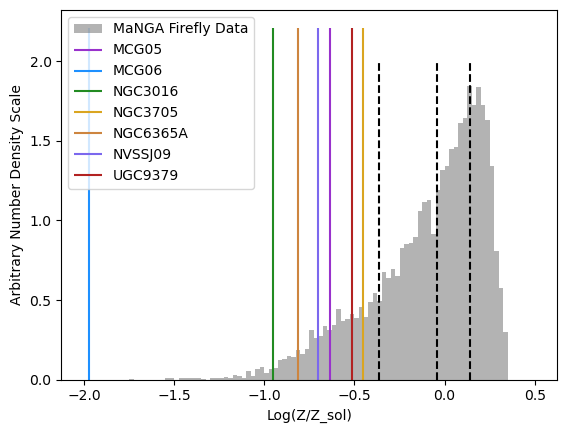

In [23]:
cat_hist,cat_bins=np.histogram(data['MW_Z_1RE'],range=(-2,0.5),bins=100,density=True)
values_mask=np.array([True,False,True,True,True,True,True])
quants=np.quantile(data['MW_Z_1RE'],[0.25,0.5,0.75])
plt.vlines(quants,ymin=0,ymax=2,colors='black',ls='--')
#plt.hist(cat_logmass[mask],bins=100,density=True)
medians=[]
plt.stairs(cat_hist, cat_bins,fill=True,alpha=0.5,label='MaNGA Firefly Data',color='dimgrey')
for num,gal in enumerate(log_mass_dict.keys()):
    med=np.median(logzsol_dict[gal])
    if gal!='MCG06':
        medians.append(med)
    print(med)
    plt.vlines(x=[med],ymin=0,ymax=1.2*np.max(cat_hist),color=nice_colours[num],label=gal)
    #hist_data,hist_bins=np.histogram(log_mass_dict[gal],bins=100,density=True)
    #hist_data*=np.max(cat_hist)/np.max(hist_data)
    #print(np.max(cat_hist))
    #print(np.max(hist_data))
    #plt.stairs(hist_data,hist_bins,label=f'{gal}',fill=True,alpha=0.7)
plt.legend()
plt.xlabel('Log(Z/Z_sol)')
plt.ylabel('Arbitrary Number Density Scale')
print(medians)
print(anderson_ksamp([medians,data['MW_Z_1RE']]))

In [34]:
data=fits.open('./Catalogs/manga-firefly-globalprop-v3_1_1-miles.fits')[2].data
data3=fits.open('./Catalogs/manga-firefly-globalprop-v3_1_1-miles.fits')[1].data

In [37]:
for num,el in enumerate(data3['MANGAID']):
    if el=='1-177358':
        print(num)

10504


In [49]:
print(GSWLC[0:10,0])

[1.23764860e+18 1.23764867e+18 1.23764594e+18 1.23764594e+18
 1.23764868e+18 1.23764868e+18 1.23764868e+18 1.23764868e+18
 1.23764868e+18 1.23764868e+18]


In [66]:
GSWLC_name=np.loadtxt('./Catalogs/GSWLC-A2.dat',usecols=[0],dtype=int)
for num,el in enumerate(GSWLC_name):
    if el==1237655373578764313:
        print(num)

In [68]:
for num,el in enumerate(GSWLC_name):
    if el==1237651311607808081:
        print(num)

In [63]:
for num,el in enumerate(GSWLC[::,0]):
    if np.isclose(int(el),1237665227304730764):
        print(el)

1.2376528991533796e+18
1.2376528991534449e+18
1.237652899153445e+18
1.237652899153445e+18
1.237652899153445e+18
1.237652899153445e+18
1.2376528991537073e+18
1.2376528991537073e+18
1.237652899153838e+18
1.2376528991533796e+18
1.2376528991534449e+18
1.237652899153707e+18
1.237652899153707e+18
1.237652899153445e+18
1.237652899153511e+18
1.2376528996902505e+18
1.2376528996905124e+18
1.2376528996906437e+18
1.2376528996907745e+18
1.23765289969084e+18
1.23765289969084e+18
1.23765289969084e+18
1.2376528996908403e+18
1.2376528996908403e+18
1.2376528996909059e+18
1.2376528996909059e+18
1.2376528996909059e+18
1.2376528996909059e+18
1.2376528996909059e+18
1.2376528996909059e+18
1.2376528996909711e+18
1.2376528996966075e+18
1.2376528996966075e+18
1.2376528996966075e+18
1.2376528996966075e+18
1.2376528996966728e+18
1.2376528996966728e+18
1.237652899696673e+18
1.2376528996967383e+18
1.2376528996967383e+18
1.237652899696804e+18
1.2376528996968694e+18
1.2376528996968694e+18
1.237652899696935e+18
1.2376

In [43]:
print(data['MW_Z_1RE'][10504])
print(data['MW_Z_1Re_ERROR'][10504])

0.009074435
0.16555569


9.16421819023659
10.682384851787603
11.42278623913497
10.373068001997591
10.89606313721352
10.269011794866685
10.687090124446645
-2.2922622582614958
-0.9460351223894554
0.3457989031685914
-1.1191767518590017
0.3283485768090633
0.30240740166100327
-0.11734799251686769
-0.6378682448107058
-1.9702536724718478
-0.9516695957343266
-0.45449203412749206
-0.8135037989665024
-0.6996431229591518
-0.5160738298001187


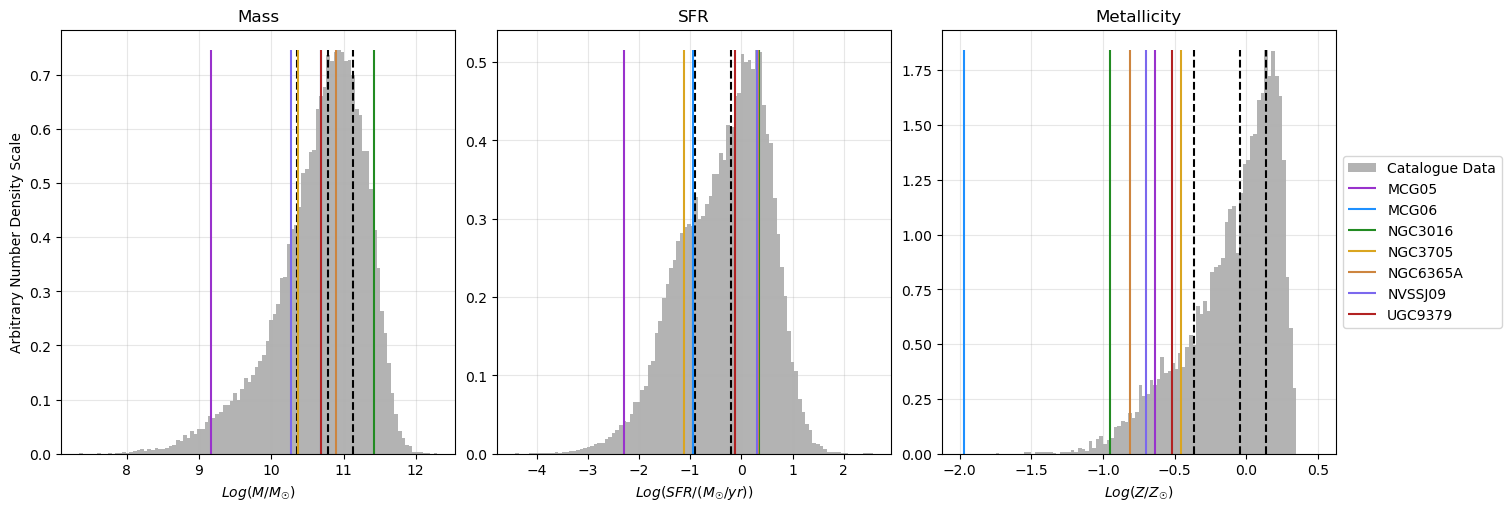

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5),layout='constrained')
cat_hist,cat_bins=np.histogram(cat_logmass[mask],bins=100,density=True)
quants=np.quantile(cat_logmass[mask],[0.25,0.5,0.75])
ax1.vlines(quants,ymin=0,ymax=np.max(cat_hist),colors='black',ls='--')
#plt.hist(cat_logmass[mask],bins=100,density=True)
ax1.stairs(cat_hist, cat_bins,fill=True,alpha=0.5,label='GSLWC Data',color='dimgrey')
for num,gal in enumerate(log_mass_dict.keys()):
    med=np.median(log_mass_dict[gal])
    print(med)
    ax1.vlines(x=[med],ymin=0,ymax=1*np.max(cat_hist),color=nice_colours[num],label=gal)
    #hist_data,hist_bins=np.histogram(log_mass_dict[gal],bins=100,density=True)
    #hist_data*=np.max(cat_hist)/np.max(hist_data)
    #print(np.max(cat_hist))
    #print(np.max(hist_data))
    #plt.stairs(hist_data,hist_bins,label=f'{gal}',fill=True,alpha=0.7)
ax1.set_xlabel(u'$Log(M/M_\u2609)$')
ax1.set_ylabel('Arbitrary Number Density Scale')
ax1.set_title('Mass')
ax1.grid(True,alpha=0.3)
cat_hist,cat_bins=np.histogram(cat_SFR[mask],bins=100,density=True)
quants=np.quantile(cat_SFR[mask],[0.25,0.5,0.75])
ax2.vlines(quants,ymin=0,ymax=np.max(cat_hist),colors='black',ls='--')
#plt.hist(cat_logmass[mask],bins=100,density=True)
ax2.stairs(cat_hist, cat_bins,fill=True,alpha=0.5,label='GSLWC Data',color='dimgrey')
for num,gal in enumerate(logSFR_dict.keys()):
    med=np.median(logSFR_dict[gal])
    print(med)
    ax2.vlines(x=[med],ymin=0,ymax=1*np.max(cat_hist),color=nice_colours[num],label=gal)
ax2.set_xlabel(u'$Log(SFR/(M_\u2609/yr))$')
#ax2.set_ylabel('Arbitrary Number Density Scale')
ax2.set_title('SFR')
ax2.grid(True,alpha=0.3)
cat_hist,cat_bins=np.histogram(data['MW_Z_1RE'],range=(-2,0.5),bins=100,density=True)
quants=np.quantile(data['MW_Z_1RE'],[0.25,0.5,0.75])
ax3.vlines(quants,ymin=0,ymax=np.max(cat_hist),colors='black',ls='--')
#plt.hist(cat_logmass[mask],bins=100,density=True)
ax3.stairs(cat_hist, cat_bins,fill=True,alpha=0.5,label='Catalogue Data',color='dimgrey')
for num,gal in enumerate(log_mass_dict.keys()):
    med=np.median(logzsol_dict[gal])
    print(med)
    plt.vlines(x=[med],ymin=0,ymax=1*np.max(cat_hist),color=nice_colours[num],label=gal)
    #hist_data,hist_bins=np.histogram(log_mass_dict[gal],bins=100,density=True)
    #hist_data*=np.max(cat_hist)/np.max(hist_data)
    #print(np.max(cat_hist))
    #print(np.max(hist_data))
    #plt.stairs(hist_data,hist_bins,label=f'{gal}',fill=True,alpha=0.7)
ax3.set_xlabel(u'$Log(Z/Z_\u2609)$')
#ax3.set_ylabel('Arbitrary Number Density Scale')
ax3.set_title('Metallicity')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.grid(True,alpha=0.3)


(array([397.,   5.,   6.,   4.,  40., 183., 382., 547., 953., 886., 762.,
        637., 378., 581., 526., 512., 443., 330., 264., 269., 200., 195.,
        207., 161., 136., 151., 153.,  94.,  97.,  78.,  95.,  87.,  68.,
         56.,  79.,  58.,  35.,  49.,  46.,  37.,  37.,  40.,  44.,  40.,
         37.,  44.,  47.,  44.,  51.,  38.,  33.,  35.,  23.,  30.,   3.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.00064969,  0.0021354 ,  0.00492048,  0.00770557,  0.01049066,
         0.01327575,  0.01606084,  0.01884593,  0.02163102,  0.0244161 ,
         0.02720119,  0.02998628,  0.03277137,  0.03555646,  0.03834154,
         0.04112663,  0.04391172,  0.04669681,  0.0494819 ,  0.05226699,
         0.05505208,  0.05

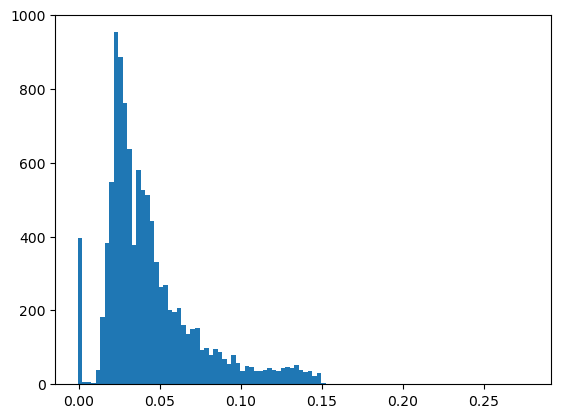

In [25]:
data1=fits.open('./Catalogs/manga-firefly-globalprop-v3_1_1-miles.fits')[1].data
plt.hist(data1['Redshift'],bins=100)

In [26]:
from IPython.display import display, Math
labels=['Log(M)','Log(Z)','Dust','Log(tau)']
for i,gal in enumerate(log_mass_dict.keys()):
    print(gal)
    percentiles=np.percentile(log_mass_dict[gal],[16,50,84])
    q=np.diff(percentiles)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(percentiles[1], q[0], q[1], 'Log(M)')
    display(Math(txt))
    percentiles=np.percentile(logzsol_dict[gal],[16,50,84])
    q=np.diff(percentiles)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(percentiles[1], q[0], q[1], 'Log(Z/Z_{{sol}})')
    display(Math(txt))
    percentiles=np.percentile(dust2_dict[gal],[16,50,84])
    q=np.diff(percentiles)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(percentiles[1], q[0], q[1], 'Dust2')
    display(Math(txt))
    percentiles=np.percentile(tau_dict[gal],[16,50,84])
    q=np.diff(percentiles)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(percentiles[1], q[0], q[1], 'tau')
    display(Math(txt))
    percentiles=np.percentile(logSFR_dict[gal],[16,50,84])
    q=np.diff(percentiles)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(percentiles[1], q[0], q[1], 'Log(SFR)')
    display(Math(txt))

MCG05


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_892/743325302.py:7: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
/tmp/ipykernel_892/743325302.py:12: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
/tmp/ipykernel_892/743325302.py:17: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
/tmp/ipykernel_892/743325302.py:22: SyntaxWarning: invalid escape sequenc

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

MCG06


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

NGC3016


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

NGC3705


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

NGC6365A


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

NVSSJ09


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

UGC9379


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
med_m=[]
med_z=[]
med_sfr=[]
for i,gal in enumerate(log_mass_dict.keys()):
    med_m.append(np.median(log_mass_dict[gal]))
    med_z.append(np.median(logzsol_dict[gal]))
    med_sfr.append(np.median(logSFR_dict[gal]))
m_percentiles=np.percentile(med_m,[25,50,75])
m_q=np.diff(m_percentiles)
z_percentiles=np.percentile(med_z,[25,50,75])
z_q=np.diff(z_percentiles)
s_percentiles=np.percentile(med_sfr,[25,50,75])
s_q=np.diff(s_percentiles)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(m_percentiles[1], m_q[0], m_q[1], 'Log(M/M_{{sol}})')
display(Math(txt))
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(z_percentiles[1], z_q[0], z_q[1], 'Log(Z/Z_{{sol}})')
display(Math(txt))
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(s_percentiles[1], s_q[0], s_q[1], 'Log(SFR)')
display(Math(txt))

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_892/76782377.py:14: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
/tmp/ipykernel_892/76782377.py:17: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
/tmp/ipykernel_892/76782377.py:20: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
with open('./iso_res.json') as f:
    iso_results=json.load(f)

In [29]:
print(iso_results['NGC3016']['cos_i'])

0.26704143413101555


In [30]:

inclination=[round(((180/np.pi)*iso_results[gal]['cos_i'])) for gal in iso_results.keys()]
offset=[round(iso_results[gal]['offset'],1) for gal in iso_results.keys()]
r50=[round(iso_results[gal]['r_50'],1) for gal in iso_results.keys()]
r90=[round(iso_results[gal]['r_90'],1) for gal in iso_results.keys()]
b_a=[round(iso_results[gal]['b_a'],1) for gal in iso_results.keys()]
print(list(iso_results.keys()))
print(inclination)


['NGC3705', 'MCG05', 'MCG06', 'UGC9379', 'NVSSJ09', 'NGC6365A', 'NGC3016']
[8, 43, 13, 15, 7, 54, 15]


In [31]:
ind=1
print(list(iso_results.keys())[ind])
print('i ',inclination[ind])
print('offset ',offset[ind])
print('r50 ',r50[ind])
print('r90', r90[ind])
print('b/a ',b_a[ind])
print(np.asarray(offset)/np.asarray(r50))

MCG05
i  43
offset  6.7
r50  9.2
r90 24.7
b/a  0.9
[1.16983373 0.72826087 0.68660969 1.51204819 1.16933638 1.25
 0.14320388]


In [32]:
print(list(iso_results.keys()))
print(np.asarray(offset)/np.asarray(r50))
print(np.median(np.asarray(offset)/np.asarray(r50)))
print(np.mean(np.asarray(offset)/np.asarray(r50)))
print(np.diff(np.percentile(np.asarray(offset)/np.asarray(r50),[25,50,75])))
print(np.std(np.asarray(offset)/np.asarray(r50)))

['NGC3705', 'MCG05', 'MCG06', 'UGC9379', 'NVSSJ09', 'NGC6365A', 'NGC3016']
[1.16983373 0.72826087 0.68660969 1.51204819 1.16933638 1.25
 0.14320388]
1.1693363844393592
0.9513275351566636
[0.46190111 0.04058048]
0.426243361967792


(0.0, 1.2)

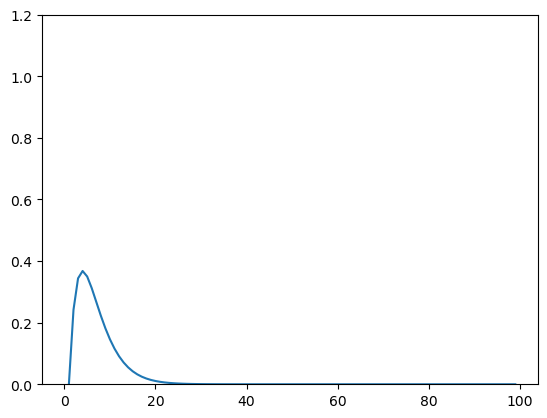

In [33]:
t=np.linspace(0,100,100)
plt.plot((t-1)*(1/3)*np.exp(-(t-1)/3))
plt.ylim(0,1.2)